In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [4]:
player = pd.read_csv('data/baseball/player.csv')
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

### Median height and weight by batting hand

Here I calculate the median weight and height of players based on which hand they bat with. 

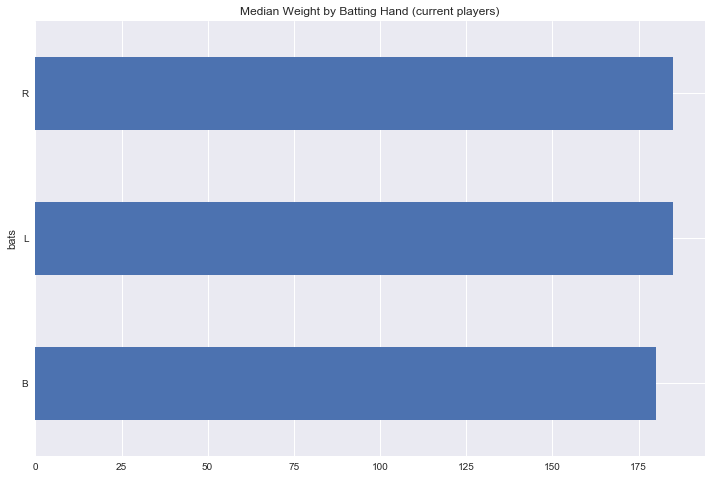

In [32]:
player.groupby('bats')['weight'].median().plot(kind='barh', figsize=(12,8),
                                                       title='Median Weight by Batting Hand (current players)')

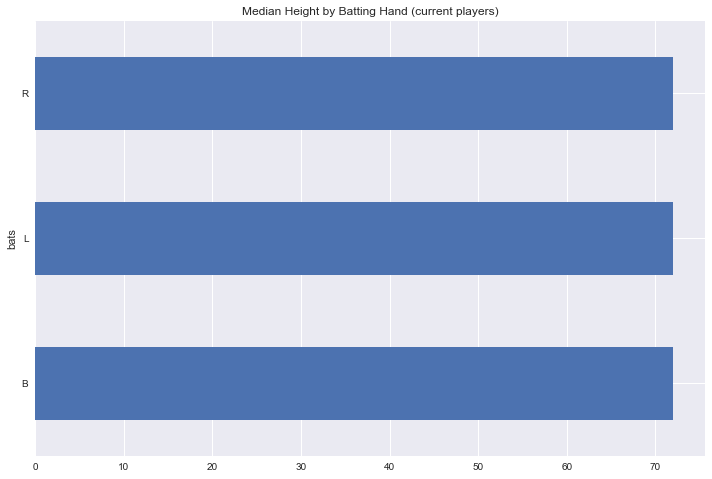

In [6]:
player.groupby('bats')['height'].median().plot(kind='barh', figsize=(12,8),
                                                       title='Median Height by Batting Hand (current players)')

### Bigger hitting over time

Here I find that the difference between the median slugger average and the median batting average has been growing over time.

In [7]:
batting['slug'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3) / batting.ab
batting['avg'] = batting.h / batting.ab
batting['obp'] = (batting.h + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['ops'] = (batting.h + batting.double + batting.triple * 2 + batting.hr * 3 + batting.bb + batting.hbp) / (batting.ab + batting.bb + batting.hbp)
batting['woba'] = (batting.h*0.9 + batting.double*0.34 + batting.triple*0.66 + batting.hr*1.05 + batting.bb*0.72 + batting.hbp*0.75) / (batting.ab + batting.bb + batting.hbp)

In [8]:
slug = batting.groupby('year')['slug'].median()
avg = batting.groupby('year')['avg'].median()
obp = batting.groupby('year')['obp'].median()
ops = batting.groupby('year')['ops'].median()
woba = batting.groupby('year')['woba'].median()

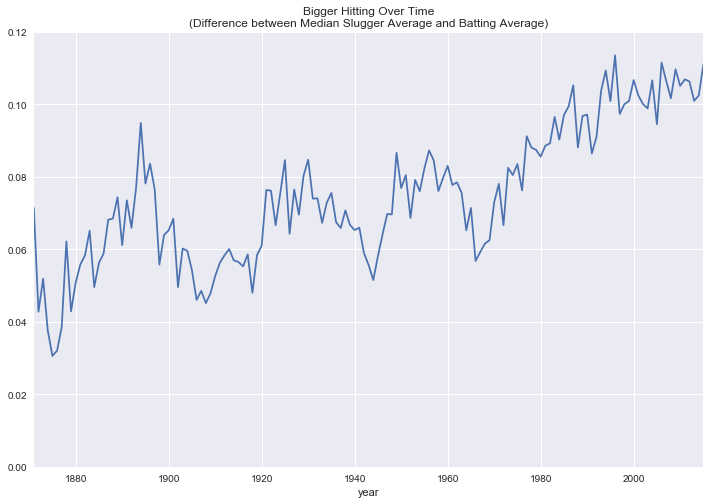

In [9]:
(slug - avg).plot(figsize=(12,8),
                  title='Bigger Hitting Over Time\n(Difference between Median Slugger Average and Batting Average)',
                 ylim=(0,0.12))

### Differences in kinds of hits over time

Here I compare the percentages of different kinds of hits across time.

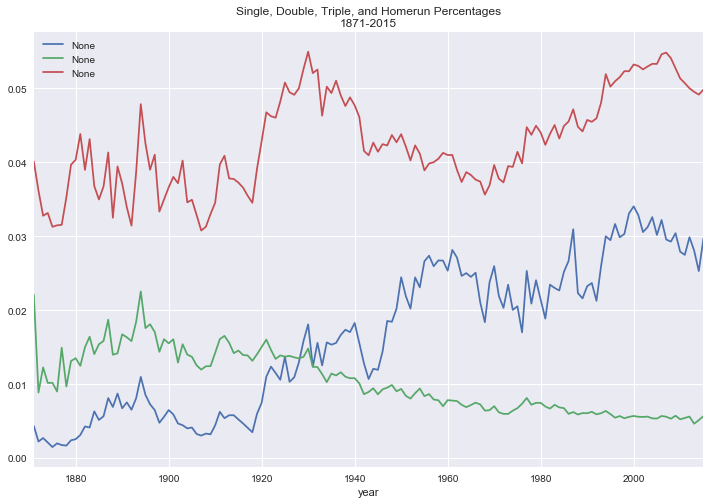

In [10]:
batting['single'] = batting.h - batting.hr - batting.double - batting.triple
hrs = batting.groupby('year')['hr'].sum()
triples = batting.groupby('year')['triple'].sum()
doubles = batting.groupby('year')['double'].sum()
singles = batting.groupby('year')['single'].sum()
ab = batting.groupby('year')['ab'].sum()

(hrs/ab).plot(figsize=(12,8), legend=True, title='Single, Double, Triple, and Homerun Percentages\n1871-2015')
(triples/ab).plot(figsize=(12,8), legend=True)
(doubles/ab).plot(figsize=(12,8), legend=True)
#(singles/ab).plot(figsize=(12,8), legend=True)

### Why are there less triples over time?

In the graph above, we find that the number of triples per at-bat has steadily declined over time. Why?

One explanation is that fielding has improved, and thus runners are less likely to reach third base safely. As a proxy for fielding, I use average number of errors per inning. As shown below, there is a steady decline in the number of errors over time, which appears to line up with the decline in triples.

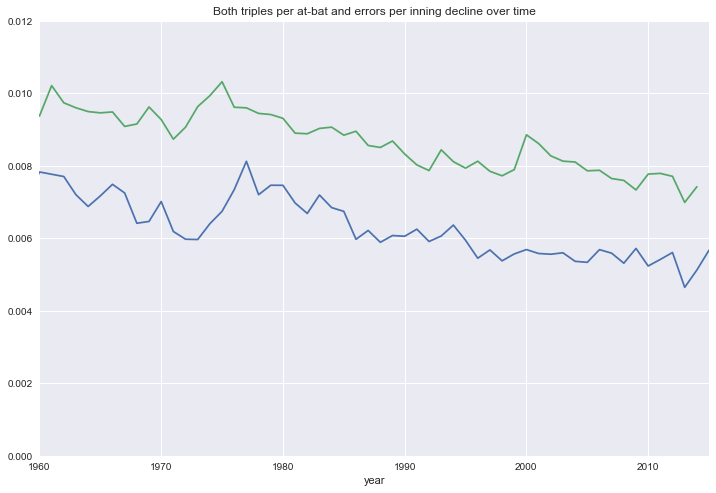

In [34]:
fielding = fielding[(fielding.inn_outs > 0) & (fielding.year > 1959)]
batting = batting[batting.year > 1959]
inns = fielding.groupby('year')['inn_outs'].sum()/3
errors = fielding.groupby('year')['e'].sum()

(triples/ab).plot(figsize=(12,8), xlim=(1960,2015), ylim=(0,.012))
(errors/inns).plot(figsize=(12,8), xlim=(1960,2015), title='Both triples per at-bat and errors per inning decline over time')

### What is the relationship between homeruns and other kinds of at-bats?

I create scatterplots to see if there is a relationship between different results of at-bats for batters within more than 200 at-bats in 2015. I plot various results compared to homeruns.

I find that there is no correlation between doubles and homeruns. Doubles can be the result of power hitting (which would be positively associated with homeruns) or from speed on the bases (which would be negatively associated with homeruns).

I find that there is a negative correlation between singles and homeruns. Players who hit a lot of homeruns do not hit as many singles. This is likely because homerun hitters also tend to hit more fly balls or strike-out more often (see below).

I find a slightly positive correlation between walks and homeruns. There are two possible explanations here. First, players who hit more homeruns are more patient, and tend to see more pitches, which inevitably leads to more walks on average. Second, pitches are more likely to intentionally throw balls to good hitters, leading to more walks.

Finally, I find a positive correlation between homeruns and strikeouts. This is likely because homerun hitters swing for power instead of contact. Thus, they are more likely to miss the ball when swinging, leading to more strikes, and thus more strikeouts.

In [11]:
batting_2015 = batting[(batting.year == 2015) &
                       (batting.ab > 200)]
batting_2015['bb_avg'] = batting_2015.bb / batting_2015.ab
batting_2015['hr_avg'] = batting_2015.hr / batting_2015.ab
batting_2015['single_avg'] = batting_2015.single / batting_2015.ab
batting_2015['triple_avg'] = batting_2015.triple / batting_2015.ab
batting_2015['double_avg'] = batting_2015.double / batting_2015.ab
batting_2015['so_avg'] = batting_2015.so / batting_2015.ab

C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jnelson\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


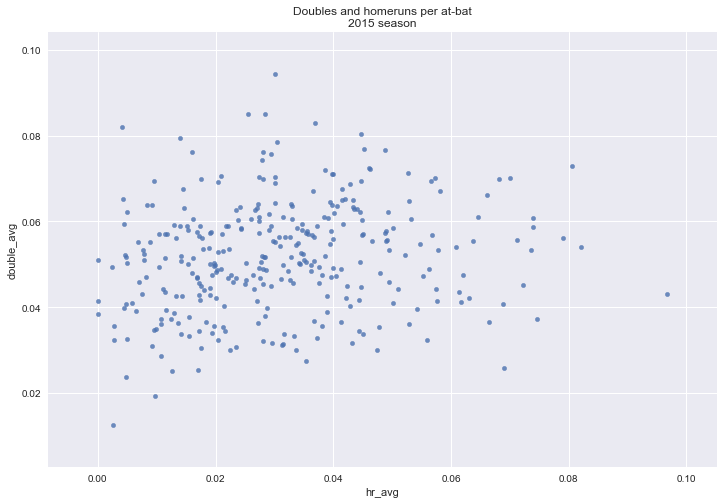

In [12]:
batting_2015.plot(x='hr_avg', y='double_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Doubles and homeruns per at-bat\n2015 season')

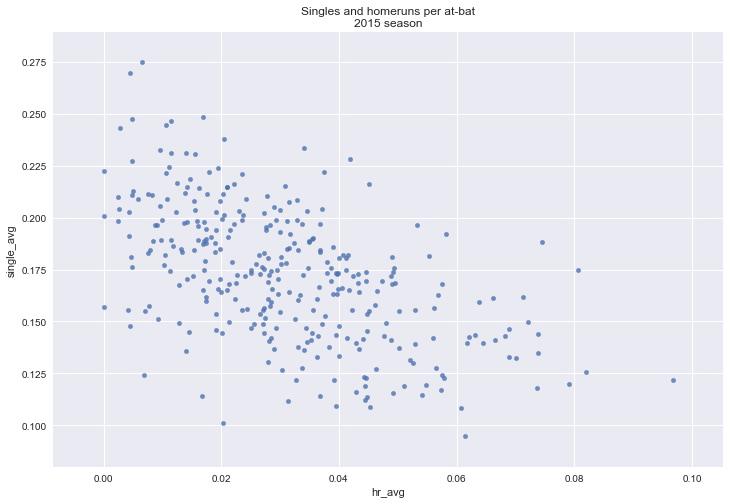

In [13]:
batting_2015.plot(x='hr_avg', y='single_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Singles and homeruns per at-bat\n2015 season')

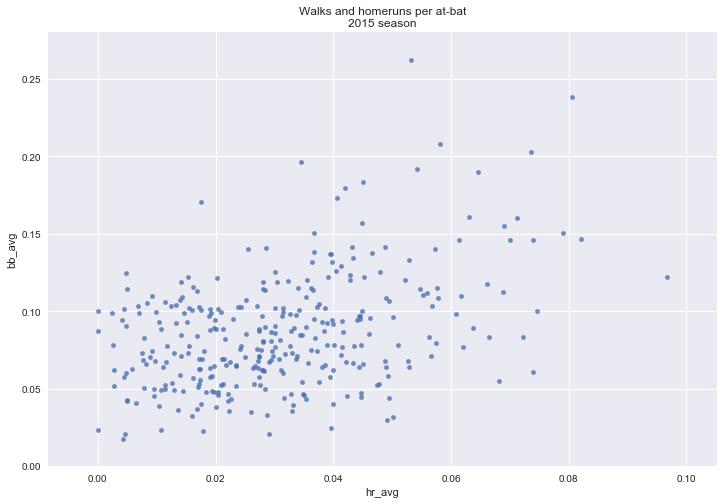

In [14]:
batting_2015.plot(x='hr_avg', y='bb_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Walks and homeruns per at-bat\n2015 season')

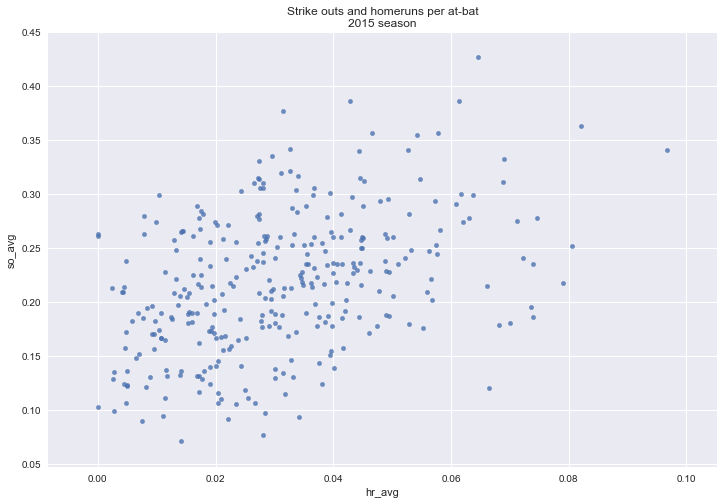

In [15]:
batting_2015.plot(x='hr_avg', y='so_avg', kind='scatter', figsize=(12,8), alpha=0.8,
                  title='Strike outs and homeruns per at-bat\n2015 season')

In [17]:
career_batting = batting.groupby('player_id').sum()
career_batting = career_batting[career_batting.ab > 1000]
career_batting.hr.sort_values(ascending=False).head(10)

player_id
bondsba01    762.0
rodrial01    687.0
griffke02    630.0
thomeji01    612.0
sosasa01     609.0
mcgwima01    583.0
aaronha01    576.0
palmera01    569.0
jacksre01    563.0
pujolal01    560.0
Name: hr, dtype: float64

In [18]:
batting_player = batting.merge(player)

In [19]:
year_2015 = batting_player[batting_player.year == 2015]
year_2015.groupby('bats').size()

bats
B    111
L    426
R    949
dtype: int64

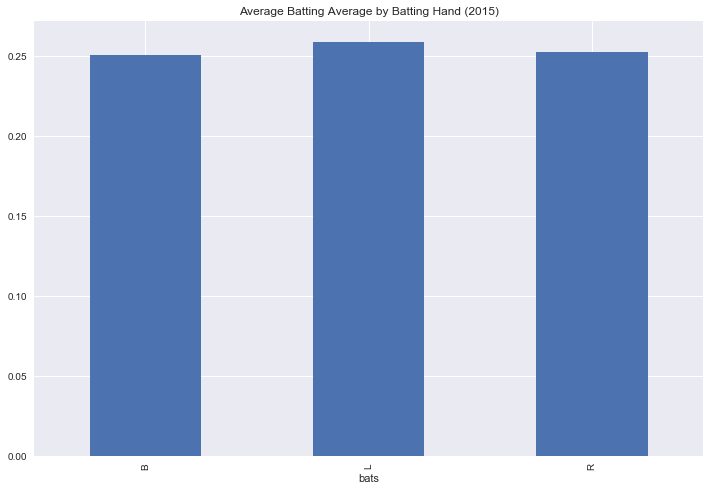

In [20]:
ab_2015 = year_2015.groupby('bats')['ab'].sum()
h_2015 = year_2015.groupby('bats')['h'].sum()
avg_2015 = h_2015 / ab_2015
avg_2015.plot(kind='bar', figsize=(12,8), title='Average Batting Average by Batting Hand (2015)')

In [21]:
batting_app = batting.merge(appearances)
batting_app = batting_app[batting_app.year > 2000]

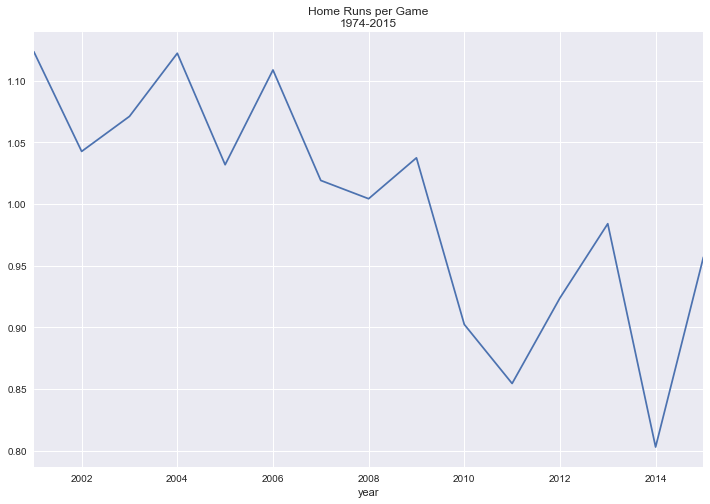

In [22]:
hr = batting_app.groupby('year')['hr'].sum()
gs = batting_app.groupby('year')['gs'].sum()
(hr/gs*9).plot(figsize=(12,8), title='Home Runs per Game\n1974-2015')

### Correlation between complete games and total pitchers

There is a significant decline in the number of complete games (where the starting pitcher pitches all nine innings) over time. One likely explanation for this is that the number of pitchers per team has increased over time, meaning that starting pitchers do not have to pitch has much per game.

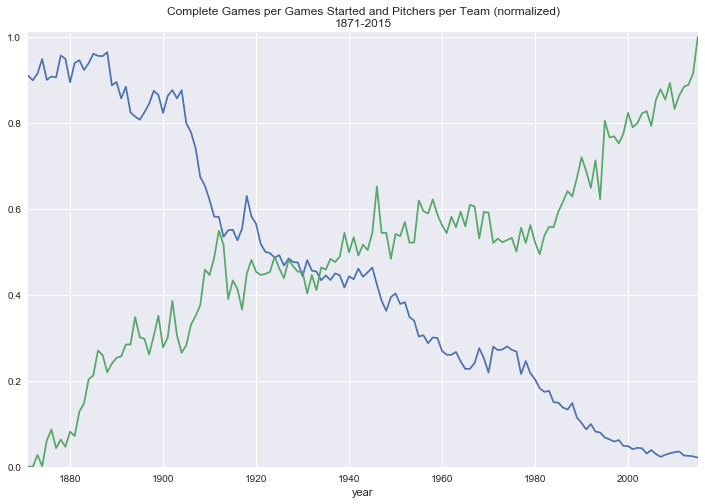

In [38]:
cg = pitching.groupby('year')['cg'].sum()
gs = pitching.groupby('year')['gs'].sum()
pitchers = pitching.groupby('year').size() / team.groupby('year').size()
pitchers = (pitchers - min(pitchers)) / (max(pitchers) - min(pitchers))
(cg/gs).plot(figsize=(12,8), title='Complete Games per Games Started and Pitchers per Team (normalized)\n1871-2015', ylim=0)
pitchers.plot(figsize=(12,8))

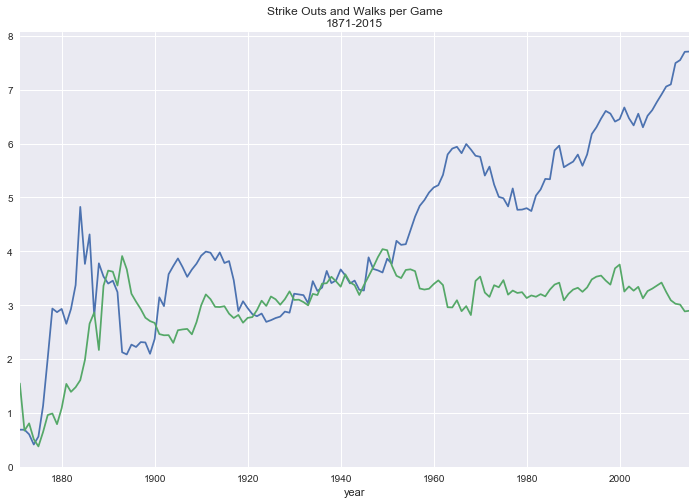

In [24]:
so = pitching.groupby('year')['so'].sum()
bb = pitching.groupby('year')['bb'].sum()
(so/gs).plot(figsize=(12,8), ylim=0)
(bb/gs).plot(figsize=(12,8), title='Strike Outs and Walks per Game\n1871-2015', ylim=0)

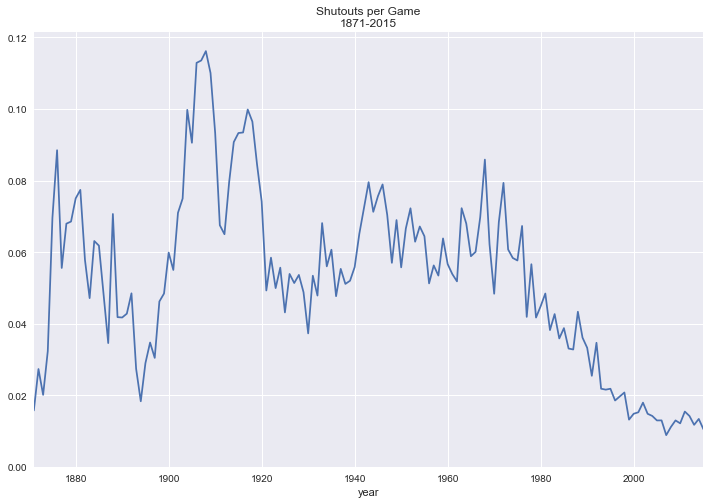

In [25]:
sho = pitching.groupby('year')['sho'].sum()
(sho/gs).plot(figsize=(12,8), title='Shutouts per Game\n1871-2015', ylim=0)